## Import Libraries

In [86]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

%matplotlib inline

## Load the Data

In [87]:
new = pd.read_csv('ML_Data.csv')

In [88]:
new = new.drop("Unnamed: 0", axis=1)

In [89]:
new.shape

(1616, 13)

In [90]:
new.head(2)

,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [91]:
# uniqeness
#new.duplicated().sum()

In [92]:
#new[new.duplicated()]

In [93]:
# Completeness
new.isnull().sum()

Name                 0
Rating               0
Number of Ratings    0
Longitude            0
Latitude             0
neighborhood         0
restaurant           0
meal_takeaway        0
meal_delivery        0
cafe                 0
food                 0
bakery               0
Weighted Rating      0
dtype: int64

In [94]:
# Accurecy types
new.dtypes

Name                  object
Rating               float64
Number of Ratings    float64
Longitude            float64
Latitude             float64
neighborhood          object
restaurant             int64
meal_takeaway          int64
meal_delivery          int64
cafe                   int64
food                   int64
bakery                 int64
Weighted Rating      float64
dtype: object

In [95]:
new.columns.to_list()

['Name',
 'Rating',
 'Number of Ratings',
 'Longitude',
 'Latitude',
 'neighborhood',
 'restaurant',
 'meal_takeaway',
 'meal_delivery',
 'cafe',
 'food',
 'bakery',
 'Weighted Rating']

In [96]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
# position is alrady encoded

categorical_features = ['Name','neighborhood']
numeric_features = ['Rating', 'Number of Ratings', 'Longitude', 'Latitude', 'restaurant',
                     'meal_takeaway', 'meal_delivery', 'cafe', 'food', 'bakery', 'Weighted Rating']

       

In [97]:

for i in categorical_features:
    print (new[i].value_counts())

Name
KFC                                                      174
Herfy                                                    149
McDonald's                                                76
Little Caesars Pizza! Pizza! !ليتل سيزرز بيتزا! بيتزا     68
Al Romansiah                                              63
                                                        ... 
لذة محشي                                                   1
مطعم ريف الشاورما                                          1
TO BE FIT مطعم صحي                                         1
RKN Pizza & Pastries Sakhna                                1
مطعم قارب البحار للمأكولات البحرية                         1
Name: count, Length: 214, dtype: int64
neighborhood
حي الندى         82
حي الملز         60
حي الربوة        60
حي الخليج        60
حي الأندلس       60
حي الحزم         60
حي نمار          60
حي ديراب         60
حي ظهرة نمار     60
هجرة وادي لبن    60
حي العارض        60
حي النرجس        60
حي الصحافة       60
حي الملقا   

In [98]:
for i in numeric_features:
    print(new[i].value_counts())


Rating
3.8    320
3.7    260
3.9    225
3.6    126
3.5    123
4.1    105
4.3    102
4.0     91
4.2     88
3.3     51
3.0     31
5.0     27
4.7     24
3.4     17
4.4      6
4.6      4
3.2      4
3.1      3
4.5      2
2.4      1
2.9      1
4.9      1
1.8      1
2.6      1
4.8      1
2.0      1
Name: count, dtype: int64
Number of Ratings
994.0     25
2198.0    25
827.0     25
639.0     24
4618.0    24
          ..
93.0       1
282.0      1
183.0      1
422.0      1
331.0      1
Name: count, Length: 205, dtype: int64
Longitude
46.737091    25
46.643634    25
46.693985    24
46.788935    24
46.703114    24
             ..
46.104862     1
46.107099     1
46.107123     1
46.108164     1
44.391117     1
Name: count, Length: 271, dtype: int64
Latitude
24.595064    25
24.600852    25
24.701278    24
24.709257    24
24.695743    24
             ..
25.114769     1
25.111499     1
25.112299     1
25.112481     1
24.504892     1
Name: count, Length: 271, dtype: int64
restaurant
1    1616
Name: count

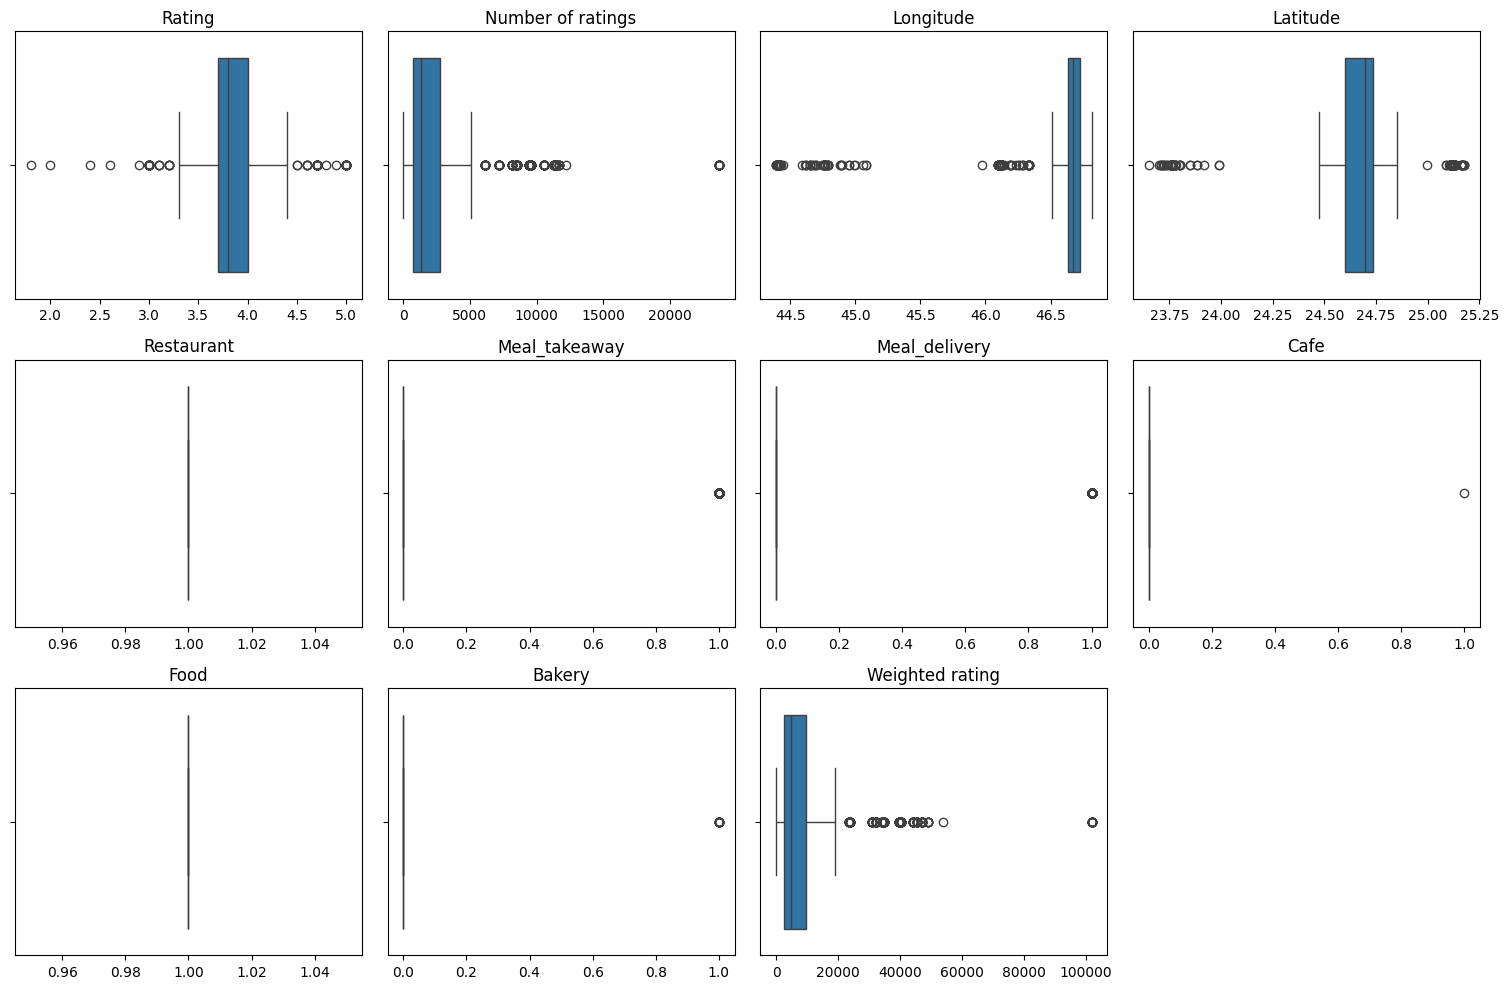

In [99]:
# boxplot for the feature 
num_features = len(numeric_features)

num_rows = math.ceil(num_features / 4)
num_cols = min(4, num_features)

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=new[column])
    plt.title(column.capitalize())
    plt.xlabel('')

plt.tight_layout()
plt.show()


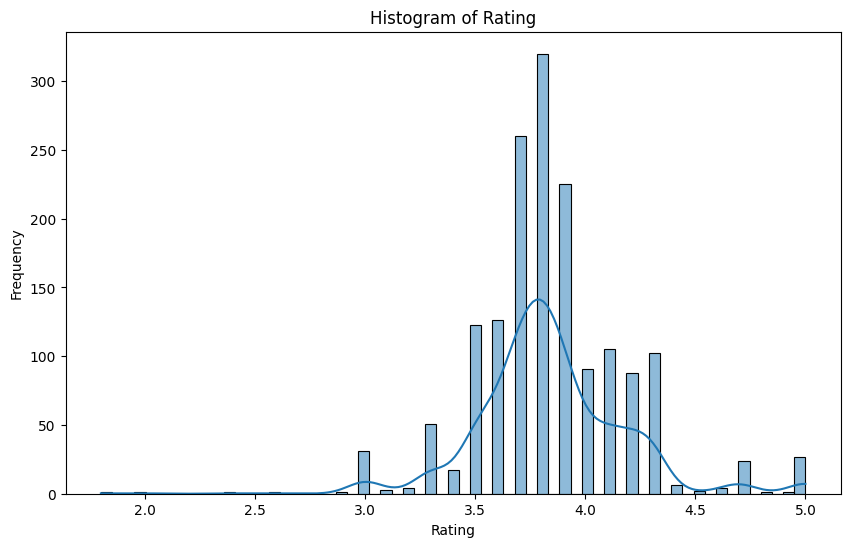

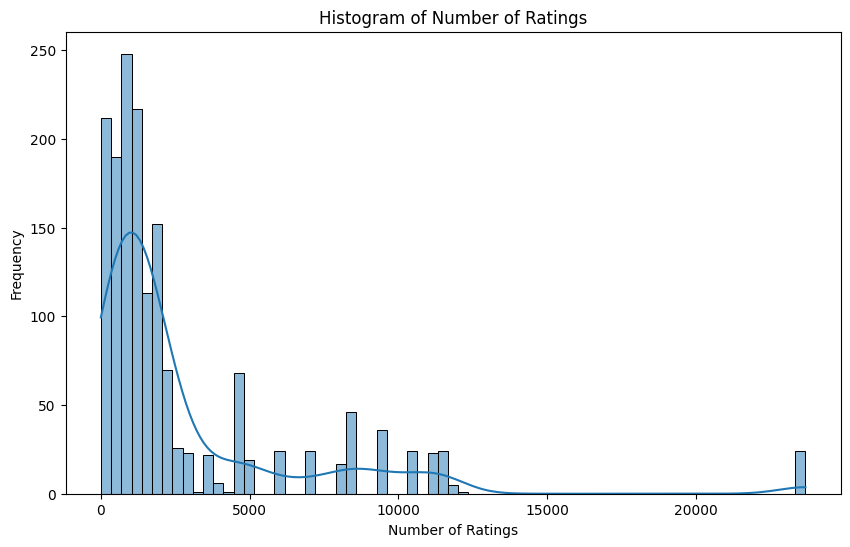

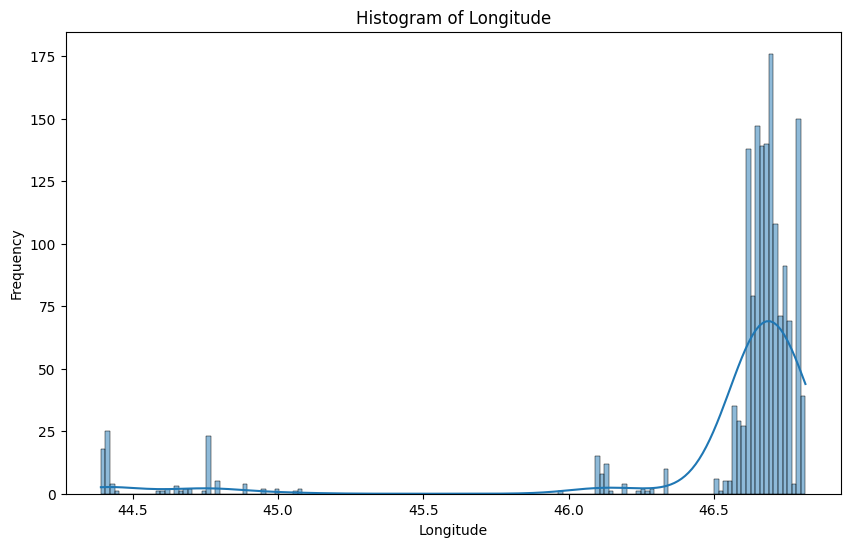

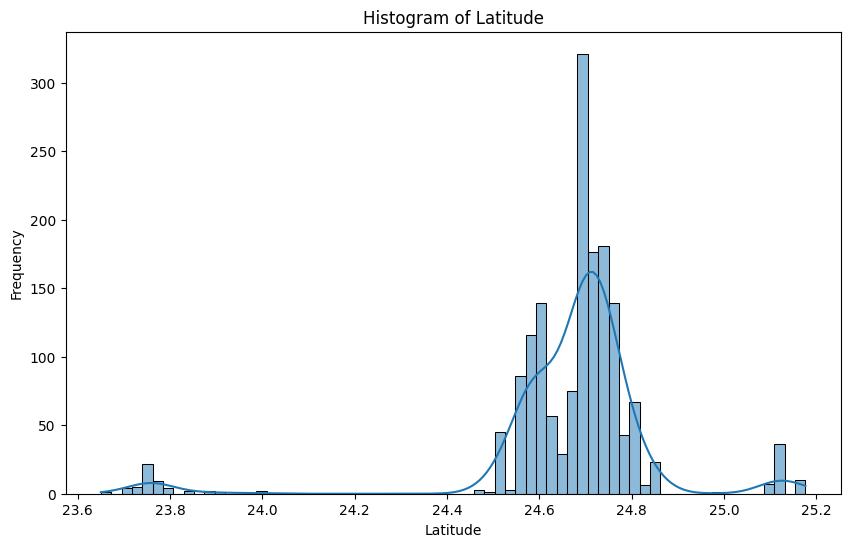

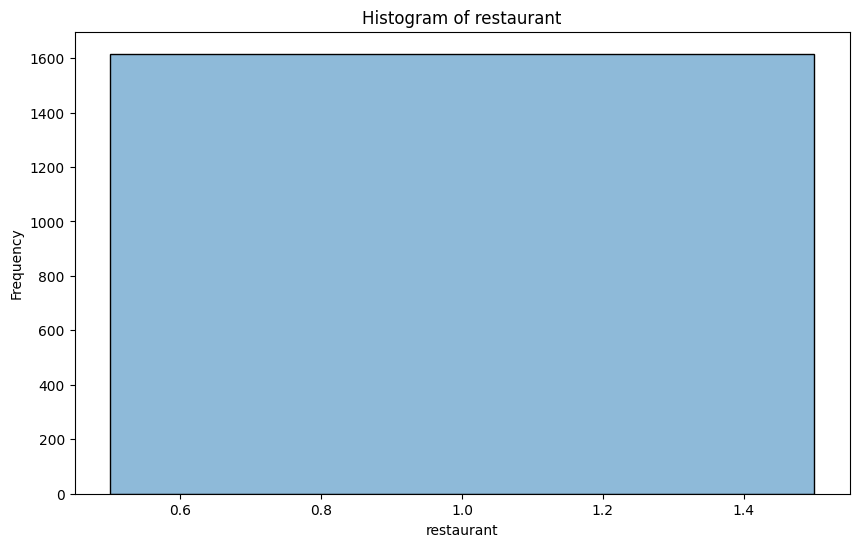

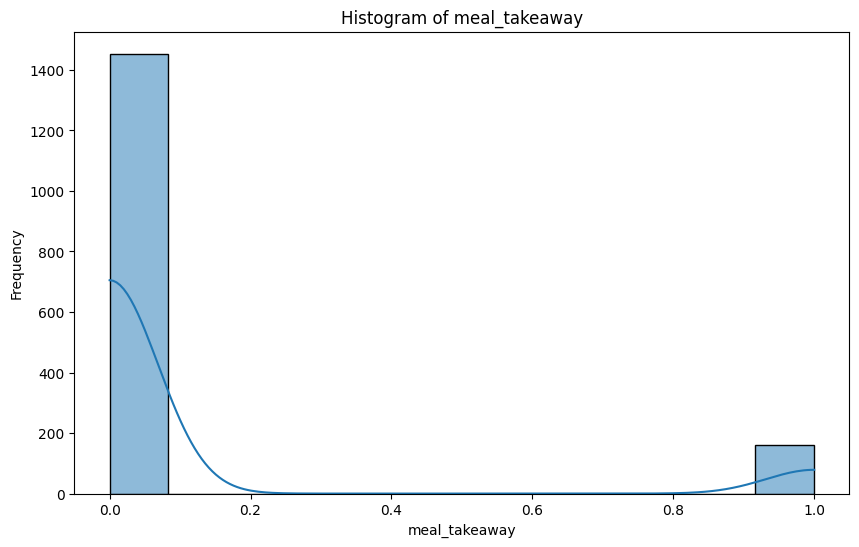

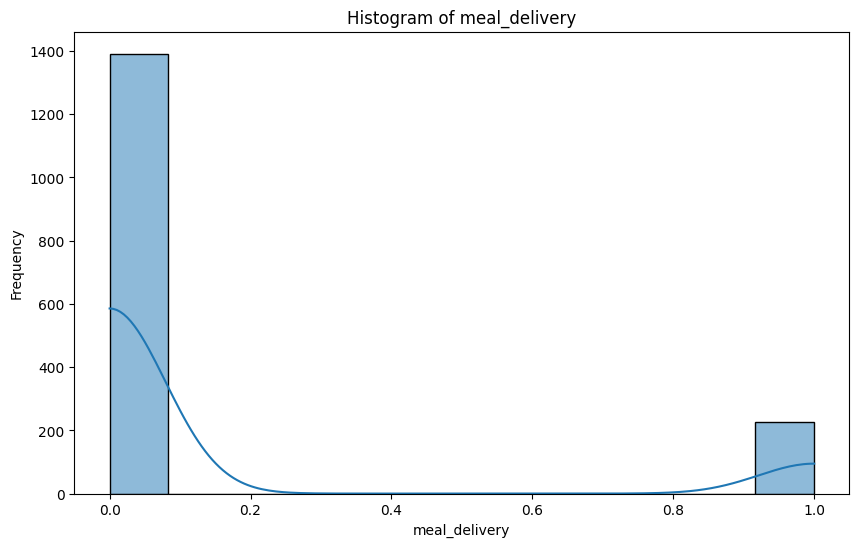

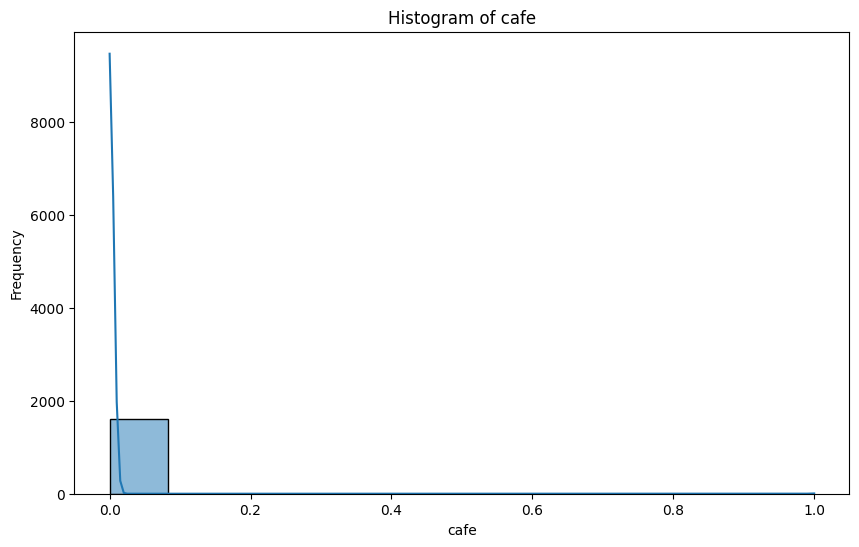

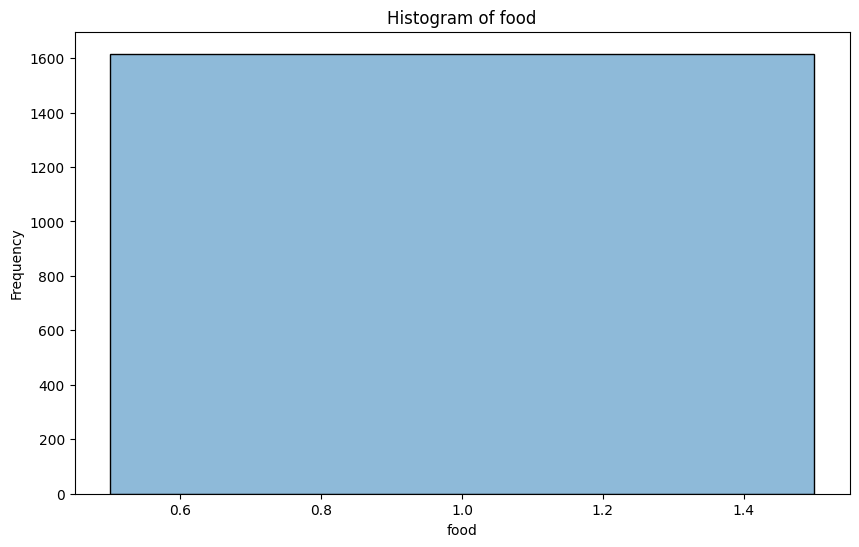

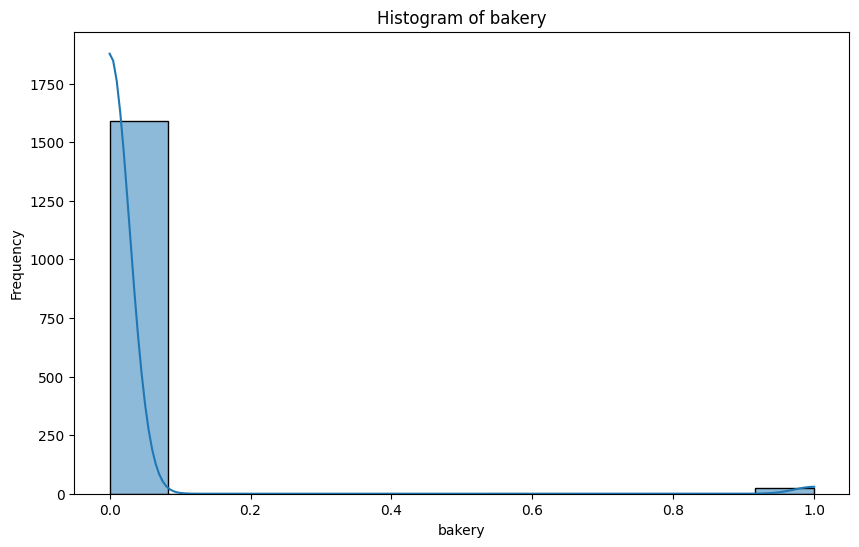

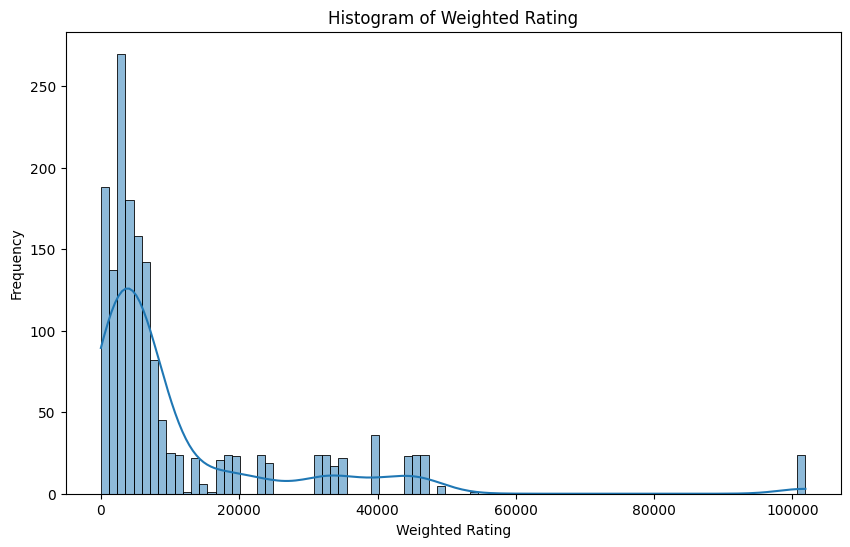

In [100]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(new[feature], kde=True)  # kde=True adds the Kernel Density Estimate line
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [101]:
new.shape

(1616, 13)

In [102]:
#Outliers NOT FOR THIS DF

# df = df[df['age']<40]
# df = df[df["appearance"]<100]
# df = df[df["goals"]>0.5]
# df = df[df['award']<5]
# df = df[df["days_injured"]<407]
# df = df[df['games_injured']<60]
# df = df[df["minutes played"]<8000]



In [103]:
# Rating??
fig = px.histogram(new, x='Rating', nbins=50, title='Histogram of Rating')
fig.show()


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [104]:
new.head(2)

,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5


#### 3. Feature selection

In [105]:

new1 = new[['Rating', 'Number of Ratings', 'Longitude', 'Latitude', 'restaurant',
                     'meal_takeaway', 'meal_delivery', 'cafe', 'food', 'bakery', 'Weighted Rating']]

In [106]:
new = pd.get_dummies(new, columns=['Name','neighborhood'])

In [107]:
new.head(2)

,Rating,Number of Ratings,Longitude,Latitude,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,...,neighborhood_حي النرجس,neighborhood_حي النهضة,neighborhood_حي الوزارات,neighborhood_حي الياسمين,neighborhood_حي جرير,neighborhood_حي حطين,neighborhood_حي ديراب,neighborhood_حي ظهرة نمار,neighborhood_حي نمار,neighborhood_هجرة وادي لبن
0,3.7,1336.0,46.693985,24.701278,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,3.5,2755.0,46.576437,24.851751,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


#### 4. Prepare train and test data

In [108]:
X = new


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X.shape

(1616, 252)

## Buliding the Model

In [110]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 5

In [111]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [112]:
distances[:,min_samples-1]

array([7.47955797, 7.47955797, 7.47955797, ..., 0.92838032, 7.47955797,
       0.76116869])

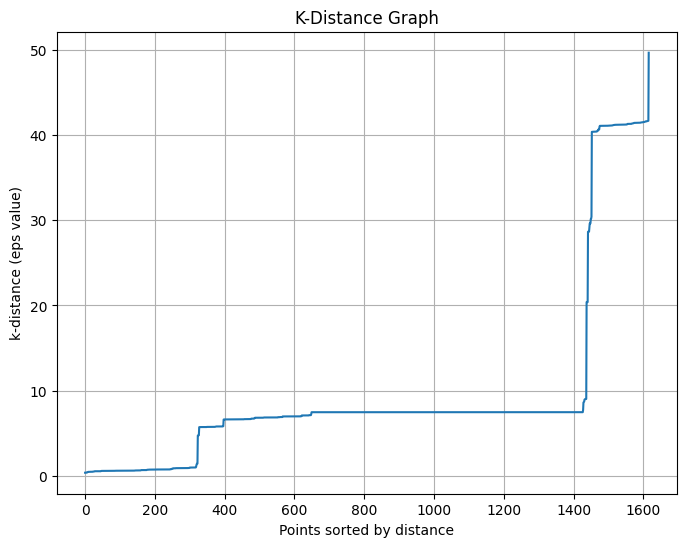

In [113]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [114]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 2 # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train and Test the Model

In [115]:

clusters = dbscan.fit_predict(X_scaled)

In [116]:
pd.Series(clusters).value_counts()

-1     1293
 18      10
 37       9
 29       8
 32       8
 33       8
 39       8
 21       8
 19       8
 2        7
 36       7
 26       7
 24       7
 0        7
 22       7
 35       7
 46       7
 16       7
 45       7
 31       7
 14       7
 12       7
 10       7
 8        7
 42       7
 6        7
 4        7
 30       7
 38       6
 40       6
 34       6
 44       6
 47       6
 28       6
 27       6
 25       6
 20       6
 17       6
 15       6
 13       6
 11       6
 9        6
 7        6
 5        6
 3        6
 1        6
 41       5
 43       5
 23       5
Name: count, dtype: int64

## Evaluating the Model 

In [117]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.5909715094781056

In [118]:
X.head(2)

,Rating,Number of Ratings,Longitude,Latitude,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,...,neighborhood_حي النرجس,neighborhood_حي النهضة,neighborhood_حي الوزارات,neighborhood_حي الياسمين,neighborhood_حي جرير,neighborhood_حي حطين,neighborhood_حي ديراب,neighborhood_حي ظهرة نمار,neighborhood_حي نمار,neighborhood_هجرة وادي لبن
0,3.7,1336.0,46.693985,24.701278,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,3.5,2755.0,46.576437,24.851751,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
X.columns

Index(['Rating', 'Number of Ratings', 'Longitude', 'Latitude', 'restaurant',
       'meal_takeaway', 'meal_delivery', 'cafe', 'food', 'bakery',
       ...
       'neighborhood_حي النرجس', 'neighborhood_حي النهضة',
       'neighborhood_حي الوزارات', 'neighborhood_حي الياسمين',
       'neighborhood_حي جرير', 'neighborhood_حي حطين', 'neighborhood_حي ديراب',
       'neighborhood_حي ظهرة نمار', 'neighborhood_حي نمار',
       'neighborhood_هجرة وادي لبن'],
      dtype='object', length=252)

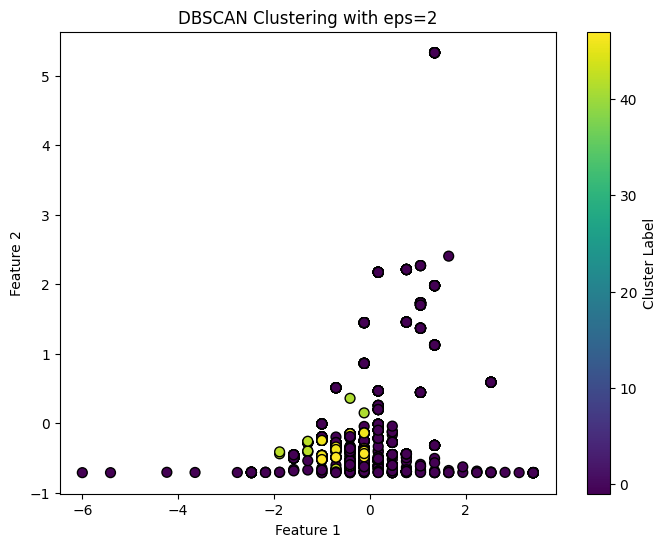

In [120]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [121]:
X['dbscan'] = clusters

In [122]:
X['dbscan'].value_counts()

dbscan
-1     1293
 18      10
 37       9
 29       8
 32       8
 33       8
 39       8
 21       8
 19       8
 2        7
 36       7
 26       7
 24       7
 0        7
 22       7
 35       7
 46       7
 16       7
 45       7
 31       7
 14       7
 12       7
 10       7
 8        7
 42       7
 6        7
 4        7
 30       7
 38       6
 40       6
 34       6
 44       6
 47       6
 28       6
 27       6
 25       6
 20       6
 17       6
 15       6
 13       6
 11       6
 9        6
 7        6
 5        6
 3        6
 1        6
 41       5
 43       5
 23       5
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='Number of Ratings'>

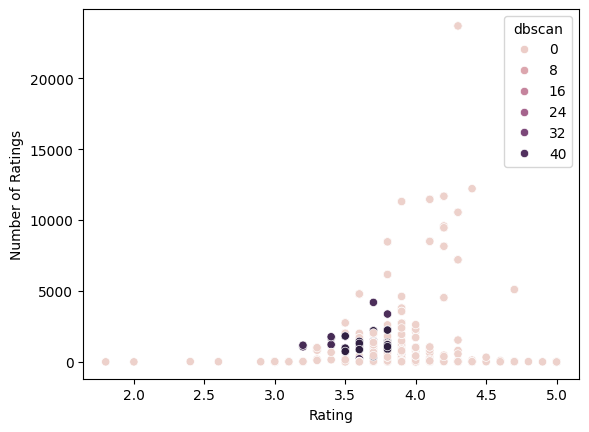

In [123]:
sns.scatterplot(data = X , x = 'Rating', y = 'Number of Ratings', hue = 'dbscan')

In [126]:
 
import joblib
joblib.dump(dbscan, 'Models/DBSCAN.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']